In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import os, sys
# sys.path.append(os.getcwd())
# import filter_eeg as fe

In [29]:
df_original = pd.read_pickle("../data/data_100hz_intrasubject_scaled.pkl")
df_original.describe()

,0,1,2,3,4,5,6,7,8,9,...,episode_type,trial_type,trial_num,episode_num,is_corrupt,action_index,trimmed_data,subject_num,left,win
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,...,1161.000000,1161.000000,1161.000000,1161.000000,1161.0,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,-7.254157,-6.224528,-6.453985,-6.416087,-9.878791,-9.758550,-10.060359,-7.333572,-4.656741,-1.351143,...,1.551249,0.485788,19.989664,14.476314,0.0,1025.596038,34.442722,5.433247,0.478898,0.616710
std,82.053102,92.480067,89.376653,84.926039,78.568914,73.582589,71.175447,71.531199,73.863059,77.976933,...,1.217403,0.500013,11.250589,8.650274,0.0,8.674554,8.294080,2.878139,0.499770,0.486398
min,-681.348840,-1242.948840,-1160.948840,-950.348840,-571.548840,-448.642062,-451.169662,-457.369662,-447.442062,-470.642062,...,0.000000,0.000000,1.000000,0.000000,0.0,987.000000,1.000000,1.000000,0.000000,0.000000
25%,-39.983973,-37.242062,-30.507845,-27.369662,-29.887373,-30.687373,-29.431202,-29.707845,-26.748840,-24.148840,...,0.000000,0.000000,10.000000,7.000000,0.0,1024.000000,34.000000,3.000000,0.000000,0.000000
50%,-4.842062,-3.562643,-3.514806,-2.631202,-6.507845,-5.369662,-5.183973,-2.714806,-3.087373,-0.983973,...,2.000000,0.000000,20.000000,14.000000,0.0,1025.000000,34.000000,5.000000,0.000000,1.000000
75%,23.485194,25.251160,22.437357,23.030338,19.485194,19.968798,19.251160,21.651160,22.957938,21.568798,...,3.000000,1.000000,30.000000,22.000000,0.0,1025.000000,38.000000,8.000000,1.000000,1.000000
max,619.957938,628.768798,613.968798,456.568798,373.157938,499.757938,586.957938,572.757938,451.030338,476.830338,...,3.000000,1.000000,39.000000,29.000000,0.0,1062.000000,76.000000,10.000000,1.000000,1.000000


### delete columns from dataframe that aren't raw readings

In [30]:
to_drop = ["episode_type","trial_type","trial_num","subject_num","episode_num","is_corrupt","action_index","trimmed_data","win","left"]

#create overall composite and composite win/loss dataframes for all subjects
df_altered = df_original
df_win = df_altered.loc[df_altered['episode_type'].isin([0,3])].drop(to_drop, axis=1)
df_loss = df_altered.loc[df_altered['episode_type'].isin([1,2])].drop(to_drop, axis=1)
df_both = df_altered.drop(to_drop, axis=1)

#create overall composite and composite win/loss dataframes for ONE subject
subject_num = 5
df_person_both = df_altered[df_altered.subject_num == subject_num]
df_person_win = df_person_both.loc[df_person_both['episode_type'].isin([0,3])].drop(to_drop, axis=1)
df_person_loss = df_person_both.loc[df_person_both['episode_type'].isin([1,2])].drop(to_drop, axis=1)

#create composite control/no control
df_control = df_altered[df_altered.trial_type == 1]
df_no_control = df_altered[df_altered.trial_type == 0]

df_control_win = df_control.loc[df_control['episode_type'].isin([0,3])].drop(to_drop, axis=1)
df_control_loss = df_control.loc[df_control['episode_type'].isin([1,2])].drop(to_drop, axis=1)

df_no_control_win = df_no_control.loc[df_no_control['episode_type'].isin([0,3])].drop(to_drop, axis=1)
df_no_control_loss = df_no_control.loc[df_no_control['episode_type'].isin([1,2])].drop(to_drop, axis=1)

#create composite no control win/loss for one subject
df_person_control = df_person_both[df_person_both.trial_type == 1]
df_person_no_control = df_person_both[df_person_both.trial_type == 0]

df_person_both = df_person_both.drop(to_drop, axis=1)

df_person_control_win = df_person_control.loc[df_person_control['episode_type'].isin([0,3])].drop(to_drop, axis=1)
df_person_control_loss = df_person_control.loc[df_person_control['episode_type'].isin([1,2])].drop(to_drop, axis=1)

df_person_no_control_win = df_person_no_control.loc[df_person_no_control['episode_type'].isin([0,3])].drop(to_drop, axis=1)
df_person_no_control_loss = df_person_no_control.loc[df_person_no_control['episode_type'].isin([1,2])].drop(to_drop, axis=1)


### average smooth the raw eeg data

In [31]:
#composite average eeg readings for all subjects and composite wins/losses
ave_both = df_both.mean()
ave_win = df_win.mean()
ave_loss = df_loss.mean()

#composite of one person's eeg readings and composite wins/losses
ave_person_both = df_person_both.mean()
ave_person_win = df_person_win.mean()
ave_person_loss = df_person_loss.mean()

#composite of all persons win/losses when percevied sway
ave_control_win = df_control_win.mean()
ave_control_loss = df_control_loss.mean()

#composite of all persons win/losses when NO percevied sway
ave_no_control_win = df_no_control_win.mean()
ave_no_control_loss = df_no_control_loss.mean()

#composite of all persons win/losses when percevied sway
ave_person_control_win = df_person_control_win.mean()
ave_person_control_loss = df_person_control_loss.mean()

#composite of all persons win/losses when NO percevied sway
ave_person_no_control_win = df_person_no_control_win.mean()
ave_person_no_control_loss = df_person_no_control_loss.mean()

### plot the average raw eeg from one person

In [32]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('a1noack', 'VKbHxdwQVQ0116wIl6CG')

x = list(range(len(ave_person_win)))

# Create a trace
win = go.Scatter(
    x = x,
    y = ave_person_win,
    name = 'avg. all wins'
)

loss = go.Scatter(
    x = x,
    y = ave_person_loss,
    name = 'avg. all losses'
)


layout = go.Layout(
    xaxis=dict(
        title='reading number',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='millivolts',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
data = [win, loss]

fig = go.Figure(data=data, layout=layout)

py.plot(fig, filename='sbj_'+str(subject_num)+'_composite_win_loss')

# sns.set(style="darkgrid")
# plt.rcParams["figure.figsize"] = [30,15]

# # plt.plot(ave_person)
# sns.tsplot(ave_person_win, color="green")
# sns.tsplot(ave_person_loss, color="red")

# plt.xlabel("reading number")
# plt.ylabel("milli-volts")
# plt.show()

'https://plot.ly/~a1noack/8'

### plot composite win/loss for one individual when there was perceived sway

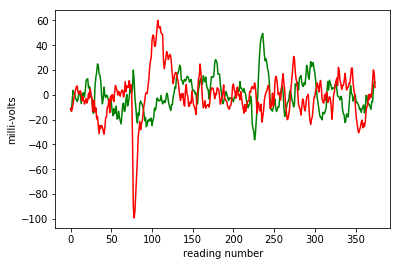

In [33]:
plt.figure()
# plt.title("Composite win/loss for participant number", subject_num)
plt.plot(ave_person_control_win, color="green")
plt.plot(ave_person_control_loss, color="red")

plt.plot()
plt.xlabel("reading number")
plt.ylabel("milli-volts")
plt.show()

### plot composite win/loss for one individual when no perceived sway

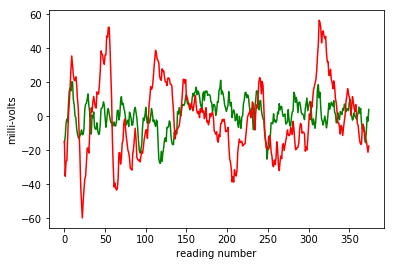

In [34]:
plt.plot(ave_person_no_control_win, color="green")
plt.plot(ave_person_no_control_loss, color="red")

plt.plot()
plt.xlabel("reading number")
plt.ylabel("milli-volts")
plt.show()

### plot the average of all of the winning episodes and losing episodes

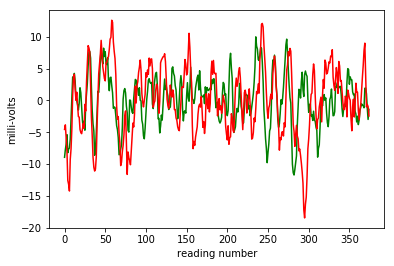

In [35]:
plt.plot(ave_win, color="green")
plt.plot(ave_loss, color="red")
# plt.plot(ave_both)
plt.xlabel("reading number")
plt.ylabel("milli-volts")
plt.show()

### plot the average of all wins/losses when perceived sway and data is filtered

filter_win = fe.filt(ave_control_win, b=.05)
filter_loss = fe.filt(ave_control_loss, b=.05)

# print(filter_win, filter_loss)

plt.plot(filter_win, color="green")
plt.plot(filter_loss, color="red")

plt.plot()
plt.xlabel("reading number")
plt.ylabel("milli-volts")
plt.show()

### plot the average of all wins/losses when perceived sway

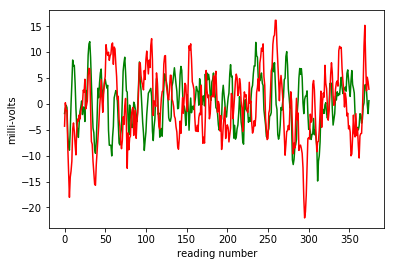

In [36]:
plt.plot(ave_control_win, color="green")
plt.plot(ave_control_loss, color="red")

plt.plot()
plt.xlabel("reading number")
plt.ylabel("milli-volts")
plt.show()

### plot the average of all wins/losses when no perceived sway

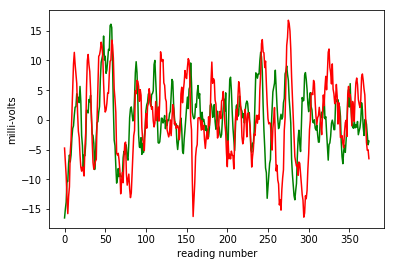

In [37]:
plt.plot(ave_no_control_win, color="green")
plt.plot(ave_no_control_loss, color="red")

plt.plot()
plt.xlabel("reading number")
plt.ylabel("milli-volts")
plt.show()